In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
import scipy as sc
from scipy import signal

# Raw Dataset

In [2]:
df = pd.read_csv(r"E:\Project\User Identity from Time-Frequency Analysis\10 Users Acceleromter Data.csv")
df

,X,Y,Z,Label
0,0.340509,8.308413,4.140585,0
1,0.381370,8.390134,4.249548,0
2,0.272407,8.471856,4.018002,0
3,0.149824,8.430995,4.290409,0
4,0.272407,8.430995,4.481094,0
...,...,...,...,...
149995,-0.762740,5.802268,7.858941,9
149996,-0.721878,5.815888,7.899802,9
149997,-0.762740,5.897611,7.736358,9
149998,-0.830841,5.979332,7.777218,9


In [3]:
length = 15000

In [25]:
import time
start_time = time.time()
k=0
X=[0 for p in range(N_Users)] # Final Array
for i in range(0,length*N_Users,length):
    temp=[]
    for j in range(length):
        x_y_z = [df.iloc[i+j,0],df.iloc[i+j,1],df.iloc[i+j,2]]
        temp.append(x_y_z)
    X[k]=temp
    k+=1 #incrementing [Final Array] indices
print("--- %s seconds ---" % (time.time() - start_time))

--- 2.8249902725219727 seconds ---


In [26]:
t=np.array(X)
t.shape

(10, 15000, 3)

In [10]:
import time
start_time = time.time()
N_Users=10
k=0
n_list= [p for p in range(N_Users)]           # All m_id in a list
X=[0 for j in range(N_Users)] # Final Array
for m_id in n_list:
    n=n_list[0]
    i=0                   # index keeping variable
    while(n!=m_id):      # Loop for searching the index of first m_id datapoint
        n=df.iloc[i,3]  # Label of i-th index datapoint
        i+=1
    temp=[]
    n=m_id
    while(n==m_id):     # Loop For inserting all datapoints of same m_id
        x_y_z = [df.iloc[i,0],df.iloc[i,1],df.iloc[i,2]]
        temp.append(x_y_z)
        n=df.iloc[i,3]
        i+=1
    X[k]=temp
    k+=1 #incrementing [Final Array] indices
print("--- %s seconds ---" % (time.time() - start_time))

IndexError: single positional indexer is out-of-bounds

In [20]:
# Main Algo for Creating Windows .....#1

def create(df,wind_size,hop_size,m_index):
  #l=((len(df.x)-wind_size)/hop_size)+1
  rows, cols = (wind_size, 3) 
#  a = [[0 for i in range(cols)] for j in range(rows)] 
  array= [0 for i in range(int((length-wind_size)/hop_size)+1)]
  k = 0
  for i in range(0,(length-wind_size+1),hop_size):
      a=create1(df,i,wind_size,m_index)
       #array.append(a)
      array[k] = a
      k+=1
  #return pd.DataFrame(array)
  return array


In [50]:
# Main Algo for Creating Windows .....#2

def create1(df,x,w,m_index):
     rows = w 
     cols = 3
     arr = [[0 for i in range(cols)] for j in range(rows)] 
     for i in range(0,w,1):
        arr[i][0]=df[x+i][0]
        arr[i][1]=df[x+i][1]
        arr[i][2]=df[x+i][2]
     arr = np.array(arr)
     f1,t1,x = signal.stft(arr[:,0],5,nperseg=10)
     f2,t2,y = signal.stft(arr[:,1],5,nperseg=10)
     f3,t3,z = signal.stft(arr[:,2],5,nperseg=10)
     temp_a = np.concatenate((abs(np.array(x)),abs(np.array(y)),abs(np.array(z))),axis=0)
    # for i in range(0,w,1):
       # x = signal.stft(arr[:,0])
       # arr[i][3]=np.mean(arr,axis=0)[0]
        #arr[i][4]=np.mean(arr,axis=0)[1]
        #arr[i][5]=np.mean(arr,axis=0)[2]
        #arr[i][6]=np.std(arr,axis=0)[0]
        #arr[i][7]=np.std(arr,axis=0)[1]
       # arr[i][8]=np.std(arr,axis=0)[2]
       # arr[i][9]=abs(sc.fft(arr[:,0]))[i]
        #arr[i][10]=abs(sc.fft(arr[:,1]))[i]
        #arr[i][11]=abs(sc.fft(arr[:,2]))[i]
     return temp_a

In [51]:
import time
start_time = time.time()
X_final = [0 for i in range( N_Users)]
for m_index in range(N_Users):
  X_final[m_index]=create(X[m_index],225,10,m_index)
print("--- %s seconds ---" % (time.time() - start_time))

--- 9.475422859191895 seconds ---


In [52]:
t=np.array(X_final[0])
t.shape

(1478, 18, 46)

In [53]:
X_input=[]
for i in range(N_Users):
  temp = X_final[i]
  X_input += temp
X_input = np.array(X_input)

In [54]:
y = [0 for i in range(X_input.shape[0])]
for i in range(X_input.shape[0]):
  y[i]=int(i*N_Users/X_input.shape[0])
y = np.array(y)

In [55]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import metrics
X_train , X_test , y_train , y_test = train_test_split(X_input,y,test_size = 0.2,shuffle=True)

In [38]:
clf_Logistic_Reg = sklearn.linear_model.LogisticRegression()
clf_SVM = sklearn.svm.SVC()
clf_dt = sklearn.tree.DecisionTreeClassifier()
clf_rf = sklearn.ensemble.RandomForestClassifier()
clf_knn = sklearn.neighbors.KNeighborsClassifier()

In [39]:
import time
start_time = time.time()
clf_Logistic_Reg.fit(X_train,y_train)
print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\Saptarshi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saptarshi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


--- 222.37724590301514 seconds ---


In [40]:
y_pred_train_Log = clf_Logistic_Reg.predict(X_train)
y_pred_test_Log = clf_Logistic_Reg.predict(X_test)

In [41]:
acc_train = metrics.accuracy_score(y_train,y_pred_train_Log)
acc_test = metrics.accuracy_score(y_test,y_pred_test_Log)
print('Logistic Regression:')
print('Accuracy: %.4f' % acc_train,'val_acc: %.4f' %acc_test)

Logistic Regression:
Accuracy: 0.6251 val_acc: 0.4073


In [42]:
recall = metrics.recall_score(y_test, y_pred_test_Log, labels=[1,2], average='micro')
precision = metrics.precision_score(y_test, y_pred_test_Log, labels=[1,2], average='micro')
f1 = metrics.f1_score(y_test, y_pred_test_Log, labels=[1,2], average='micro')
print('Recall: %.4f' % recall,'Precision: %.4f' % precision,'F-Measure: %.4f' % f1)

Recall: 0.3092 Precision: 0.2983 F-Measure: 0.3036


In [43]:
start_time = time.time()
clf_rf.fit(X_train,y_train)
print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\Saptarshi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


--- 2.512234687805176 seconds ---


In [44]:
y_pred_train_rf = clf_rf.predict(X_train)
y_pred_test_rf = clf_rf.predict(X_test)

In [45]:
acc_train = metrics.accuracy_score(y_train,y_pred_train_rf)
acc_test = metrics.accuracy_score(y_test,y_pred_test_rf)
print('Random Forest:')
print('Accuracy: %.4f' % acc_train,'val_acc: %.4f' %acc_test)

Random Forest:
Accuracy: 0.9967 val_acc: 0.6357


In [46]:
recall = metrics.recall_score(y_test, y_pred_test_rf, labels=[1,2], average='micro')
precision = metrics.precision_score(y_test,y_pred_test_rf, labels=[1,2], average='micro')
f1 = metrics.f1_score(y_test, y_pred_test_rf, labels=[1,2], average='micro')
print('Recall: %.4f' % recall,'Precision: %.4f' % precision,'F-Measure: %.4f' % f1)

Recall: 0.6408 Precision: 0.4914 F-Measure: 0.5562


In [47]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout

Using TensorFlow backend.


In [56]:
clf = tensorflow.keras.Sequential()

In [57]:
clf.add(keras.layers.Conv2D(64, (3,3), activation= 'relu', input_shape = (X_input.shape[1],X_input.shape[2],1), padding='same'))
clf.add(keras.layers.Conv2D(32, (3,3), activation= 'relu',padding='same'))
clf.add(keras.layers.MaxPool2D(pool_size= (1,1)))
clf.add(keras.layers.Dropout(rate= 0.5))

clf.add(keras.layers.Conv2D(64, (3,3), activation= 'relu',padding='same'))
clf.add(keras.layers.Conv2D(32, (3,3), activation= 'relu',padding='same'))
clf.add(keras.layers.MaxPool2D(pool_size= (1,1)))
clf.add(keras.layers.Dropout(rate= 0.5))


clf.add(keras.layers.Flatten())
          
clf.add(keras.layers.Dense(128,activation='relu'))
clf.add(keras.layers.Dense(32,activation = 'relu'))
clf.add(keras.layers.Dense(N_Users,activation='softmax'))

In [58]:
clf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 46, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 46, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 18, 46, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 46, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 46, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 46, 32)       

In [59]:
clf.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [60]:
#Reshaping the input
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [61]:
history = clf.fit(X_train,y_train,batch_size=128,epochs=50,validation_data=(X_test,y_test))

Train on 11824 samples, validate on 2956 samples
Epoch 1/50
11824/11824 [==============================] - 48s 4ms/sample - loss: 1.9397 - accuracy: 0.2847 - val_loss: 1.6890 - val_accuracy: 0.4002
Epoch 2/50
11824/11824 [==============================] - 45s 4ms/sample - loss: 1.5356 - accuracy: 0.4345 - val_loss: 1.3730 - val_accuracy: 0.5074
Epoch 3/50
11824/11824 [==============================] - 47s 4ms/sample - loss: 1.2703 - accuracy: 0.5507 - val_loss: 1.1385 - val_accuracy: 0.6184
Epoch 4/50
11824/11824 [==============================] - 46s 4ms/sample - loss: 1.0686 - accuracy: 0.6204 - val_loss: 0.9980 - val_accuracy: 0.6478
Epoch 5/50
11824/11824 [==============================] - 44s 4ms/sample - loss: 0.8748 - accuracy: 0.6897 - val_loss: 0.9408 - val_accuracy: 0.6813
Epoch 6/50
11824/11824 [==============================] - 48s 4ms/sample - loss: 0.7215 - accuracy: 0.7426 - val_loss: 0.6850 - val_accuracy: 0.7629
Epoch 7/50
11824/11824 [==============================] -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


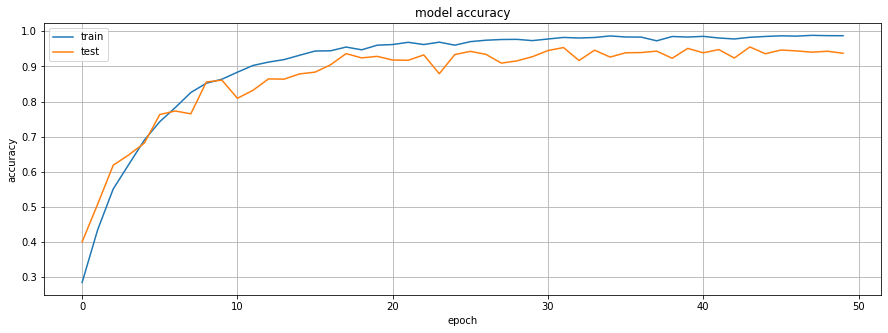

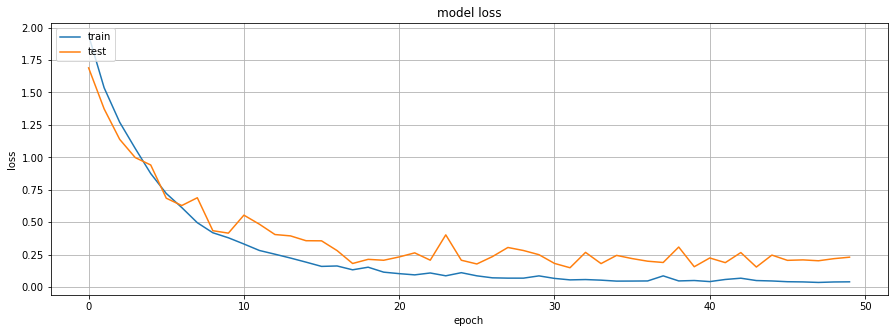

In [62]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid()
plt.show()

In [64]:
from sklearn import metrics
pred_y = clf.predict(X_test)

In [65]:
y_pred=[]
for i in range(y_test.shape[0]):
     temp=np.array(pred_y[i])    
     maximum = np.where(temp==max(temp))
     y_pred.append(maximum[0]) 

In [66]:
recall = metrics.recall_score(y_test, y_pred, labels=[1,2], average='micro')
precision = metrics.precision_score(y_test, y_pred, labels=[1,2], average='micro')
f1 = metrics.f1_score(y_test, y_pred, labels=[1,2], average='micro')
print('Recall: %.4f' % recall,'Precision: %.4f' % precision,'F-Measure: %.4f' % f1)

Recall: 0.9488 Precision: 0.8944 F-Measure: 0.9208


In [67]:
metrics_df=pd.DataFrame(history.history)
metrics_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.939709,0.284675,1.688964,0.400203
1,1.535623,0.434540,1.373000,0.507442
2,1.270301,0.550660,1.138489,0.618403
3,1.068598,0.620433,0.997957,0.647835
4,0.874820,0.689699,0.940771,0.681326


In [68]:
loss = pd.DataFrame(metrics_df.iloc[:,0].values,columns=[str(N_Users)])
accuracy = pd.DataFrame(metrics_df.iloc[:,1].values,columns=[str(N_Users)])
val_loss = pd.DataFrame(metrics_df.iloc[:,2].values,columns=[str(N_Users)])
val_accuracy = pd.DataFrame(metrics_df.iloc[:,3].values,columns=[str(N_Users)])

In [70]:
cf_matrix=metrics.confusion_matrix(y_test,y_pred)
cf_matrix

array([[267,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 306,   1,   0,   0,   0,   1,   0,   0,   4],
       [  0,   4, 287,   0,   0,   1,   1,   0,  17,   3],
       [  7,   6,   3, 261,   0,   1,   1,   0,  11,   3],
       [  0,   9,   5,   3, 278,   1,   3,   2,   0,   2],
       [  0,   3,   2,   0,   0, 324,   0,   2,   2,   5],
       [  0,   5,   3,   0,   0,   0, 251,   1,   6,   3],
       [  6,   4,   9,   2,   1,   3,   1, 253,   4,   8],
       [  0,   1,   4,   0,   0,   0,   2,   0, 276,   2],
       [  2,   9,   1,   0,   0,   1,   2,   1,   0, 268]], dtype=int64)

In [71]:
cf_mat = pd.DataFrame(cf_matrix)
cf_mat
cf_mat.to_csv(r"E:\Project\User Identity from Time-Frequency Analysis\Project Report\Results\Confusion Matrix\cf_mat_10.csv")

In [72]:
loss.to_csv(r"E:\Project\User Identity from Time-Frequency Analysis\Project Report\Results\Loss\loss_10.csv")
accuracy.to_csv(r"E:\Project\User Identity from Time-Frequency Analysis\Project Report\Results\Accuracy\accuracy_10.csv")
val_loss.to_csv(r"E:\Project\User Identity from Time-Frequency Analysis\Project Report\Results\Val_Loss\val_loss_10.csv")
val_accuracy.to_csv(r"E:\Project\User Identity from Time-Frequency Analysis\Project Report\Results\Val_Accuracy\val_accuracy_10.csv")

In [48]:
def calcSTFT_norm(inputSignal, samplingFreq, window='hann', nperseg=256, figsize=(9,5), cmap='magma', ylim_max=None):

    ##Calculating STFT
    f, t, Zxx = signal.stft(inputSignal, samplingFreq, window=window, nperseg=nperseg)
    ##Plotting STFT
    fig = plt.figure(figsize=figsize)
    ### Different methods can be chosen for normalization: PowerNorm; LogNorm; SymLogNorm.
    ### Reference: https://matplotlib.org/tutorials/colors/colormapnorms.html
    spec = plt.pcolormesh(t, f, np.abs(Zxx), 
                          norm=matplotlib.colors.PowerNorm(gamma=1./8.),
                          #norm=colors.LogNorm(vmin=np.abs(Zxx).min(), vmax=np.abs(Zxx).max()),
                          #norm=colors.SymLogNorm(linthresh=0.13, linscale=1,
                          #                       vmin=-1.0, vmax=1.0),
                          cmap=plt.get_cmap(cmap))
    cbar = plt.colorbar(spec)
    ##Plot adjustments
    plt.title('STFT Spectrogram')
    ax = fig.axes[0]
    ax.grid(True)
    ax.set_title('STFT Magnitude')
    if ylim_max:
        ax.set_ylim(0,ylim_max)
    ax.set_ylabel('Frequency [Hz]')
    ax.set_xlabel('Time [sec]')
    fig.show
    return

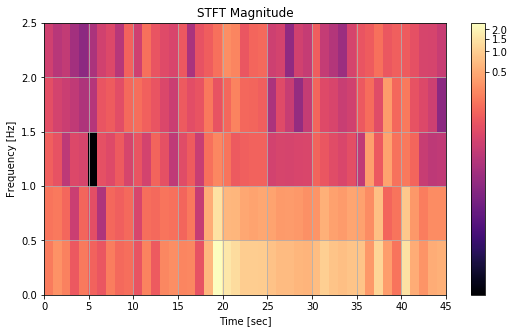

In [49]:
y = calcSTFT_norm(x,5,nperseg=10)

In [40]:
f,t,Zxx = signal.stft(x,5,nperseg=10)

In [43]:
abs(Zxx).shape

(6, 46)

In [45]:
Zxx[0,0]

(0.18830579161680117+0j)